In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
X, y = data.data, data.target

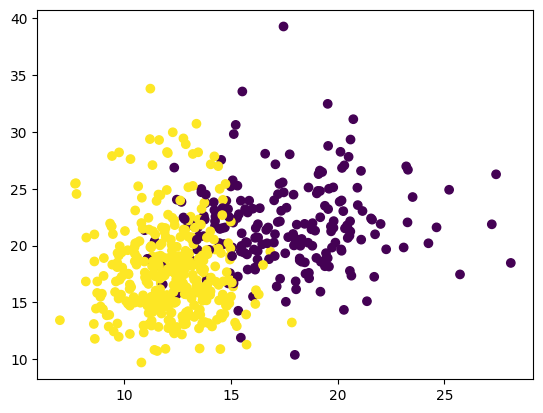

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [8]:
lr.score(X_train_scaled, y_train)

0.967032967032967

In [9]:
from sklearn.metrics import accuracy_score

pred_train = lr.predict(X_train_scaled)

pred_test = lr.predict(X_test_scaled)

train_acc = accuracy_score(pred_train, y_train)
print(f"Train Accuracy: {train_acc*100:.2f}%")


test_acc = accuracy_score(pred_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Train Accuracy: 96.70%
Test Accuracy: 96.49%


In [10]:
from sklearn.model_selection import train_test_split
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
    X, y, test_size=0.2)
X_syn_train.shape, X_syn_test.shape, y_syn_train.shape, y_syn_test.shape

((455, 30), (114, 30), (455,), (114,))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_syn_train_scaled = scaler.fit_transform(X_syn_train)
X_syn_test_scaled = scaler.transform(X_syn_test)

In [12]:
import tensorflow as tf
model_syn = tf.keras.Sequential()
model_syn.add(tf.keras.layers.Dense(10, activation="relu"))
model_syn.add(tf.keras.layers.Dense(10, activation="relu"))
model_syn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_syn.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                 metrics=["accuracy"])

model_syn_history = model_syn.fit(X_syn_train_scaled, y_syn_train, epochs=500)

Epoch 1/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5540 - loss: 0.6890
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5924 - loss: 0.6842  
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6459 - loss: 0.6764  
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6187 - loss: 0.6732 
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6392 - loss: 0.6657 
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6135 - loss: 0.6675 
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6134 - loss: 0.6618 
Epoch 8/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6056 - loss: 0.6658 
Epoch 9/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6451 - loss: 0.6520 
Epoch 10/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6252 - loss: 0.6531 
Epoch 11/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6206 - loss: 0.6546 
Epoch 12/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [13]:
model_syn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 433 (1.70 KB)

 Trainable params: 431 (1.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Text(0, 0.5, 'loss')

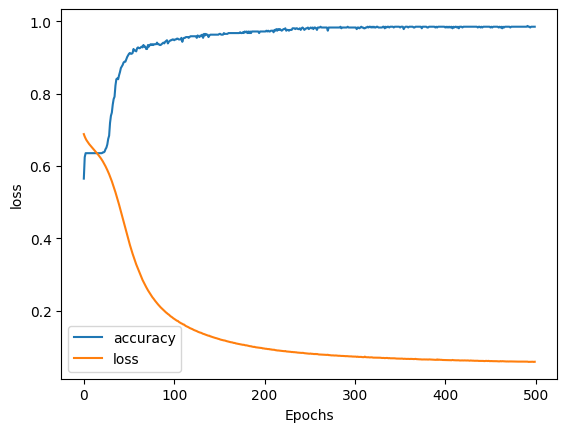

In [14]:
pd.DataFrame(model_syn_history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("loss")

In [15]:
loss, accuracy = model_syn.evaluate(X_syn_test_scaled, y_syn_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9766 - loss: 0.0596  
Model loss on the test set: 0.07539267092943192
Model accuracy on the test set: 96.49%
